# Support Vector Machine Vs. Ridge Regression

In this problem, we compare linear SVM and Ridge Regression in the task of classification. As we shall see, formulating the problem as different optimization problems (here SVM and Ridge Regression) makes a difference in performance. There are three places with todos, follow the todos to complete this problem.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

In [9]:
# Helper function for visualization. No todo here. 
# Usage: plot_boundry(X, y, fitted_model)
#     X: your features, where each row is a data sample
#     y: your labels, can be 0/1 or -1/1
#     fitted_model: a scipy TRAINED model, such as sklearn.svm.SVC
#
def plot_boundry(X, y, fitted_model):
    
    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.5  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        x_max = 110
        y_max = 60
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = np.sign(Z)
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y==0,0], X[y==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y==1,0], X[y==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type)
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
    

In [10]:
# load the data
train_data = np.load("ridge_vs_svm_data_train.npy")
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

test_data= np.load("ridge_vs_svm_data_test.npy")
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

Here we visualize the training data to get a sense of the distribution. Note the outliers.

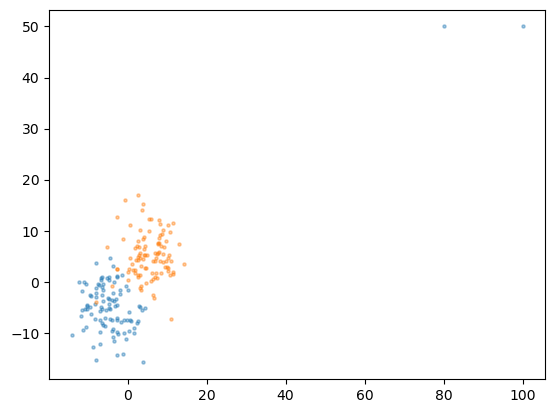

In [11]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], alpha=0.4, s=5)
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], alpha=0.4, s=5)

## SVM

Fill in the code below to run a __linear__ svm to classify the data.

Test Accuracy: 0.925


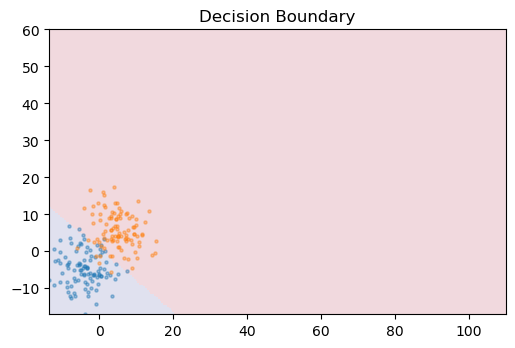

In [12]:
fitted_model = None # your trained model (as trained by scipy)
y_pred = None # the prediction of your trained model on the testing data

########## Your beautiful code starts here ##########
# todo: Write code to train an SVM, and generate prediction y_pred.
# Optional: Try using a linear kernel and a polynomial kernel.  How does the value of C matter? 
# ttodo: remove this staff soln
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train) 
########## Your beautiful code ends here ##########

y_pred = svc.predict(X_test)
fitted_model = svc

accuracy = accuracy_score(y_pred, y_test)
print("Test Accuracy: {}".format(accuracy)) 

plot_boundry(X_test, y_test, fitted_model)

## Ridge Regression

Fill in the code below to run ridge regression to classify the data.

Test Accuracy: 0.83


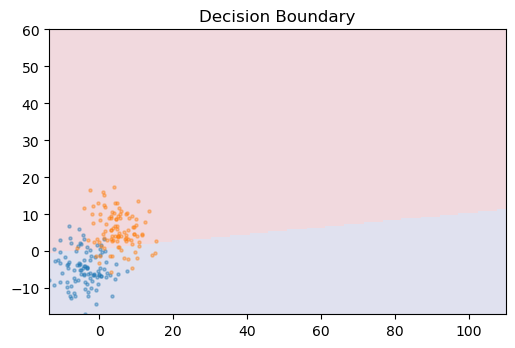

In [13]:
fitted_model = None # your trained model (as trained by scipy)
y_pred_sign = None # the prediction of your trained model on the testing data

# convert the labels from 0 and 1 to -1 and 1
y_train_sign = np.array(y_train)
y_test_sign = np.array(y_test)
y_train_sign[y_train_sign == 0] = -1
y_test_sign[y_test_sign == 0] = -1

# for the regularization parameter lambda, you can try something around 0.1 :)
# Optional: try choosing different parameters
llambda = 0.1

########## Your beautiful code starts here ##########
# todo: train a fitted_model and run prediction to generate y_pred_sign
# ttodo: remove this staff soln

ridge = Ridge(alpha=llambda)
ridge.fit(X_train, y_train_sign)
y_pred_sign = ridge.predict(X_test)
y_pred_sign = np.sign(y_pred_sign) # This is terrible; make a new variable
fitted_model = ridge
########## Your beautiful code ends here ##########

accuracy = accuracy_score(y_pred_sign, y_test_sign)
print("Test Accuracy: {}".format(accuracy))

plot_boundry(X_test, y_test, fitted_model)

# Why Do We See SVM Outperforming Ridge Regression?

In the above, we saw that SVM outperforms ridge regression because SVM is more robust to outliers. The data was actually synthetically generated from two Gaussians --- but remember the two outliers? Can you see how they are impacting the classifer? 

#todo

There were two outliers. SVM handles outliers well by assigning greater slack for them, whereas Ridge Regression does not do that. Hence Ridge Regression will move the boundary a lot to compensate for the outliers.

# How the Data was produced

In [14]:
# Optional: Try changing the positions of the outliers to see how they impact the performanace

n = 100
cov = np.eye(2) * 20

pos = np.hstack([
    np.ones(n).reshape([-1, 1]),
    np.random.multivariate_normal([5, 5], cov, size=n),
])
neg = np.hstack([
    np.zeros(n).reshape([-1, 1]),
    np.random.multivariate_normal([-5, -5], cov, size=n),
])

syn = np.vstack([pos, neg])

outliers = np.array([
    [0, 80, 50,],
    [0, 100, 50,],
])
syn = np.vstack([pos, neg, outliers])
np.random.shuffle(syn)
np.save("ridge_vs_svm_data_train.npy", syn)


pos_test = np.hstack([
    np.ones(n).reshape([-1, 1]),
    np.random.multivariate_normal([5, 5], cov, size=n),
])
neg_test = np.hstack([
    np.zeros(n).reshape([-1, 1]),
    np.random.multivariate_normal([-5, -5], cov, size=n),
])

syn = np.vstack([pos_test, neg_test])

np.random.shuffle(syn)
np.save("ridge_vs_svm_data_test.npy", syn)

# Credit

Spring 2019: Mong H. Ng, Prof. Ranade <br>
Plotting function from https://github.com/devssh/svm/blob/master/SVM%20Python/Classifier%20Visualization.ipynb